In [54]:
import pandas as pd
import nilmtk
import matplotlib.pyplot as plt
import random
import sys
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import h5py
from nilmtk import DataSet
from nilmtk.utils import print_dict
from nilmtk.datastore import HDFDataStore
from matplotlib import rcParams
from nilmtk.utils import find_nearest
from nilmtk.feature_detectors import cluster
from nilmtk.legacy.disaggregate import Disaggregator
from nilmtk.datastore import HDFDataStore
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model

In [59]:
test = DataSet('E:\\github\\Nilm\\redd_low.h5')
test.set_window(start="30-4-2011")
test_elec = test.buildings[1].elec
test_mains = test_elec.mains().all_meters()[0]

In [61]:
test_mains = test_elec.submeters()

In [63]:
test_mains.power_series()

<generator object Electric.load_series at 0x0000021285BEB5F0>

In [58]:
A = next(test_mains)

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=4, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=20, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.

Done loading data all meters for this chunk.


In [50]:
A

2011-04-30 00:00:00-04:00    1277.0
2011-04-30 00:00:03-04:00    1279.0
2011-04-30 00:00:06-04:00    1279.0
2011-04-30 00:00:09-04:00    1274.0
2011-04-30 00:00:12-04:00    1272.0
                              ...  
2011-05-24 15:56:21-04:00     240.0
2011-05-24 15:56:24-04:00     240.0
2011-05-24 15:56:27-04:00     243.0
2011-05-24 15:56:30-04:00     242.0
2011-05-24 15:56:33-04:00       NaN
Freq: 3S, Name: (power, active), Length: 710332, dtype: float32

In [51]:
test_mains = test_elec.submeters().power_series_all_data()

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=4, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=20, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.

Done loading data all meters for this chunk.


In [53]:
type(test_mains)

pandas.core.series.Series

In [41]:
metadata = {'building': 1,
            'dataset': 'mydataset',
            'instance': 1,
            'appliances': {'mains': {'meters': ['active', 'power']}}}

In [42]:
from nilmtk import ElecMeter

In [43]:
elec_meter = ElecMeter(**metadata)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\ipython-8.11.0-py3.8.egg\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\12933\AppData\Local\Temp\ipykernel_58316\129103711.py", line 1, in <module>
    elec_meter = ElecMeter(**metadata)
TypeError: __init__() got an unexpected keyword argument 'building'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\ipython-8.11.0-py3.8.egg\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\ipython-8.11.0-py3.8.egg\IPython\core\ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\ipython-8.11.0-py3.8.egg\

In [38]:
test_mains

2011-04-30 00:00:00-04:00    1277.0
2011-04-30 00:00:03-04:00    1279.0
2011-04-30 00:00:06-04:00    1279.0
2011-04-30 00:00:09-04:00    1274.0
2011-04-30 00:00:12-04:00    1272.0
                              ...  
2011-05-24 15:56:21-04:00     240.0
2011-05-24 15:56:24-04:00     240.0
2011-05-24 15:56:27-04:00     243.0
2011-05-24 15:56:30-04:00     242.0
2011-05-24 15:56:33-04:00       NaN
Freq: 3S, Name: (power, active), Length: 710332, dtype: float32

In [66]:
redd_data = DataSet('E:\\github\\Nilm\\redd_low.h5')

In [67]:
redd_data.set_window(end="30-4-2011") #Use data only until 4/30/2011
train_elec = redd_data.buildings[1].elec

In [4]:
type(train_elec)

nilmtk.metergroup.MeterGroup

In [68]:
train_mains = train_elec.mains().all_meters()[0] # The aggregated meter that provides the input
train_meter = train_elec.submeters()['fridge'] # The microwave meter that is used as a training target

In [69]:
train_meter

ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])

In [6]:
train_meter

ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])

In [7]:
from RNN import RNNDisaggregator
disaggregator = RNNDisaggregator()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 16)             80        
_________________________________________________________________
bidirectional (Bidirectional (None, 1, 256)            148480    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,264,977
Trainable params: 1,264,977
Non-trainable params: 0
_________________________________________________________________


In [8]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')

In [9]:
disaggregator.train(train_mains, train_meter, epochs=1, sample_period=3)
disaggregator.export_model("A.h5")

260/260 [==============================] - 6s 21ms/step - loss: 1.1815e-04


In [10]:
test = DataSet('E:\\github\\Nilm\\redd_low.h5')
test.set_window(start="30-4-2011")
test_elec = test.buildings[1].elec
test_mains = test_elec.mains().all_meters()[0]

In [11]:
disag_filename = 'xxxx.h5' # The filename of the resulting datastore
from nilmtk.datastore import HDFDataStore
output = HDFDataStore(disag_filename, 'w')

In [13]:
disaggregator.disaggregate(test_elec,test_elec['fridge'],output, train_meter, sample_period=3)


Loading data for meter ElecMeterID(instance=1, building=1, dataset='REDD')     

e:\github\nilm\nilmtk\nilmtk\metergroup.py:939: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warnings.warn("As a quick implementation we only get Good Sections from"


Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
New sensible chunk: 489198
<class 'pandas.core.series.Series'>
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\ipython-8.11.0-py3.8.egg\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\12933\AppData\Local\Temp\ipykernel_14068\3746914780.py", line 1, in <module>
    disaggregator.disaggregate(test_elec,test_elec['fridge'],output, train_meter, sample_period=3)
  File "e:\github\NILM\RNN\RNN.py", line 151, in disaggregate
    self._save_metadata_for_disaggregation(
  File "e:\github\nilm\nilmtk\nilmtk\legacy\disaggregate\disaggregator.py", line 145, in _save_metadata_for_disaggregation
    'physical_quantity': measurement[0],
TypeError: 'NoneType' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\ipython-8.11.0-py3.8.egg\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb 

In [16]:
result = DataSet('E:\\github\\Nilm\\RNN\\xxxx.h5')
res_elec = result.buildings[1].elec
predicted = res_elec['fridge']
ground_truth = test_elec['fridge']

import matplotlib.pyplot as plt
predicted.plot()
ground_truth.plot()
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\ipython-8.11.0-py3.8.egg\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\12933\AppData\Local\Temp\ipykernel_15004\488623395.py", line 1, in <module>
    result = DataSet('E:\\github\\Nilm\\RNN\\xx.h5')
  File "e:\github\nilm\nilmtk\nilmtk\dataset.py", line 45, in __init__
    self.import_metadata(get_datastore(filename, format))
  File "e:\github\nilm\nilmtk\nilmtk\dataset.py", line 54, in import_metadata
    self.metadata = store.load_metadata()
  File "e:\github\nilm\nilmtk\nilmtk\docinherit.py", line 53, in f
    return self.mthd(obj, *args, **kwargs)
  File "e:\github\nilm\nilmtk\nilmtk\datastore\hdfdatastore.py", line 186, in load_metadata
    metadata = deepcopy(node._v_attrs.metadata)
  File "e:\anaconda\conda\envs\Nilm_01\lib\site-packages\tables-3.8.0-py3.8-win-amd64.egg\tables\attributeset.py", line 283, i

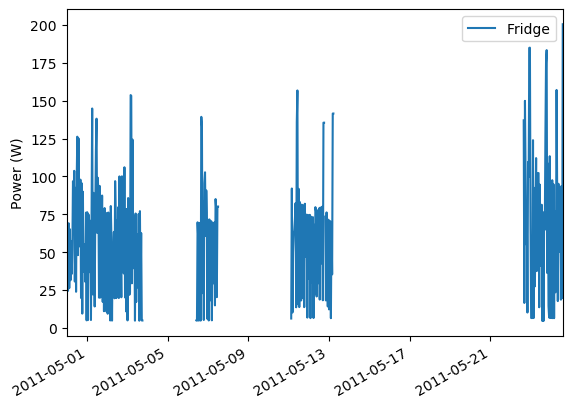

In [15]:
predicted.plot()
plt.show()

In [12]:
from nilmtk.electric import align_two_meters
import numpy as np

def tp_tn_fp_fn(states_pred, states_ground):
    tp = np.sum(np.logical_and(states_pred == 1, states_ground == 1))
    fp = np.sum(np.logical_and(states_pred == 1, states_ground == 0))
    fn = np.sum(np.logical_and(states_pred == 0, states_ground == 1))
    tn = np.sum(np.logical_and(states_pred == 0, states_ground == 0))
    return tp, tn, fp, fn

def recall_precision_accuracy_f1(pred, ground):
    aligned_meters = align_two_meters(pred, ground)
    threshold = ground.on_power_threshold()
    chunk_results = []
    sum_samples = 0.0
    for chunk in aligned_meters:
        sum_samples += len(chunk)
        pr = np.array([0 if (p)<threshold else 1 for p in chunk.iloc[:,0]])
        gr = np.array([0 if p<threshold else 1 for p in chunk.iloc[:,1]])

        tp, tn, fp, fn = tp_tn_fp_fn(pr,gr)
        p = sum(pr)
        n = len(pr) - p

        chunk_results.append([tp,tn,fp,fn,p,n])

    if sum_samples == 0:
        return None
    else:
        [tp,tn,fp,fn,p,n] = np.sum(chunk_results, axis=0)

        res_recall = recall(tp,fn)
        res_precision = precision(tp,fp)
        res_f1 = f1(res_precision,res_recall)
        res_accuracy = accuracy(tp,tn,p,n)

        return (res_recall,res_precision,res_accuracy,res_f1)

def relative_error_total_energy(pred, ground):
    aligned_meters = align_two_meters(pred, ground)
    chunk_results = []
    sum_samples = 0.0
    for chunk in aligned_meters:
        chunk.fillna(0, inplace=True)
        sum_samples += len(chunk)
        E_pred = sum(chunk.iloc[:,0])
        E_ground = sum(chunk.iloc[:,1])

        chunk_results.append([
                            E_pred,
                            E_ground
                            ])
    if sum_samples == 0:
        return None
    else:
        [E_pred, E_ground] = np.sum(chunk_results,axis=0)
        return abs(E_pred - E_ground) / float(max(E_pred,E_ground))

def mean_absolute_error(pred, ground):
    aligned_meters = align_two_meters(pred, ground)
    total_sum = 0.0
    sum_samples = 0.0
    for chunk in aligned_meters:
        chunk.fillna(0, inplace=True)
        sum_samples += len(chunk)
        total_sum += sum(abs((chunk.iloc[:,0]) - chunk.iloc[:,1]))
    if sum_samples == 0:
        return None
    else:
        return total_sum / sum_samples


def recall(tp,fn):
    return tp/float(tp+fn)

def precision(tp,fp):
    return tp/float(tp+fp)

def f1(prec,rec):
    return 2 * (prec*rec) / float(prec+rec)

def accuracy(tp, tn, p, n):
    return (tp + tn) / float(p + n)


In [16]:
import metrics
rpaf = metrics.recall_precision_accuracy_f1(predicted, ground_truth)
print("============ Recall: {}".format(rpaf[0]))
print("============ Precision: {}".format(rpaf[1]))
print("============ Accuracy: {}".format(rpaf[2]))
print("============ F1 Score: {}".format(rpaf[3]))

print("============ Relative error in total energy: {}".format(metrics.relative_error_total_energy(predicted, ground_truth)))
print("============ Mean absolute error(in Watts): {}".format(metrics.mean_absolute_error(predicted, ground_truth)))

============ Recall: 0.7668438360354849
============ Precision: 0.5850545539413035
============ Accuracy: 0.6731762823219103
============ F1 Score: 0.6637266258480887
============ Relative error in total energy: 0.2583151712534099
============ Mean absolute error(in Watts): 22.976693577836617
